In [62]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [63]:
movie = pd.read_csv("my_movies.csv")
#buff.decode(, 'ignore')

movie

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [64]:
movie.isnull().sum()

V1               0
V2               0
V3               3
V4               8
V5               9
Sixth Sense      0
Gladiator        0
LOTR1            0
Harry Potter1    0
Patriot          0
LOTR2            0
Harry Potter2    0
LOTR             0
Braveheart       0
Green Mile       0
dtype: int64

In [65]:
movie= movies.dropna(axis=1)
movie

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile,V1_Gladiator,V1_Harry Potter1,V1_LOTR1,V1_Sixth Sense,V2_Harry Potter2
0,1,0,1,1,0,1,0,0,0,1,0,0,0,1,0
1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0
2,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0
3,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1
7,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1,0,0,0,1,0


In [66]:
movies=pd.get_dummies(movie)
movies

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile,V1_Gladiator,V1_Harry Potter1,V1_LOTR1,V1_Sixth Sense,V2_Harry Potter2
0,1,0,1,1,0,1,0,0,0,1,0,0,0,1,0
1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0
2,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0
3,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1
7,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1,0,0,0,1,0


In [69]:
movies = movies.drop(["V1_Gladiator","V1_Harry Potter1","V1_LOTR1","V1_Sixth Sense","V2_Harry Potter2"], axis=1)
movies

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


# Apriori Algorithm 

In [71]:
frequent_itemsets = apriori(movies, min_support=0.1, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [73]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
2,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
3,(Sixth Sense),(LOTR1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
4,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
...,...,...,...,...,...,...,...,...,...
245,(LOTR1),"(Green Mile, LOTR2, Harry Potter1, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
246,(Green Mile),"(LOTR1, LOTR2, Harry Potter1, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
247,(LOTR2),"(LOTR1, Green Mile, Harry Potter1, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
248,(Sixth Sense),"(LOTR1, Green Mile, LOTR2, Harry Potter1)",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08


In [74]:
rules.sort_values('lift',ascending = False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
210,"(LOTR1, Green Mile)","(LOTR2, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
170,"(LOTR1, Sixth Sense)","(Green Mile, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
140,"(Gladiator, Green Mile)","(LOTR, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf
225,"(LOTR1, Green Mile, LOTR2)","(Harry Potter1, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf
156,"(LOTR1, Sixth Sense)","(LOTR2, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
137,"(Gladiator, Green Mile, Sixth Sense)",(LOTR),0.1,0.1,0.1,1.0,10.0,0.09,inf
184,"(LOTR1, Sixth Sense)","(Green Mile, LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
185,"(Green Mile, LOTR2)","(LOTR1, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf
215,"(LOTR2, Harry Potter1)","(LOTR1, Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf
171,"(Green Mile, Harry Potter1)","(LOTR1, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf


In [75]:
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
6,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
7,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
10,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
...,...,...,...,...,...,...,...,...,...
245,(LOTR1),"(Green Mile, LOTR2, Harry Potter1, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
246,(Green Mile),"(LOTR1, LOTR2, Harry Potter1, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
247,(LOTR2),"(LOTR1, Green Mile, Harry Potter1, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
248,(Sixth Sense),"(LOTR1, Green Mile, LOTR2, Harry Potter1)",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08


In [76]:
rules[rules.lift>2]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
22,(LOTR1),(Harry Potter1),0.2,0.2,0.1,0.5,2.5,0.06,1.6
23,(Harry Potter1),(LOTR1),0.2,0.2,0.1,0.5,2.5,0.06,1.6
24,(LOTR1),(LOTR2),0.2,0.2,0.2,1.0,5.0,0.16,inf
25,(LOTR2),(LOTR1),0.2,0.2,0.2,1.0,5.0,0.16,inf
26,(LOTR1),(Green Mile),0.2,0.2,0.1,0.5,2.5,0.06,1.6
...,...,...,...,...,...,...,...,...,...
244,"(Harry Potter1, Sixth Sense)","(LOTR1, Green Mile, LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
245,(LOTR1),"(Green Mile, LOTR2, Harry Potter1, Sixth Sense)",0.2,0.1,0.1,0.5,5.0,0.08,1.8
246,(Green Mile),"(LOTR1, LOTR2, Harry Potter1, Sixth Sense)",0.2,0.1,0.1,0.5,5.0,0.08,1.8
247,(LOTR2),"(LOTR1, Green Mile, Harry Potter1, Sixth Sense)",0.2,0.1,0.1,0.5,5.0,0.08,1.8


In [77]:
x = rules.support
y = rules.confidence

Text(0, 0.5, 'confidence')

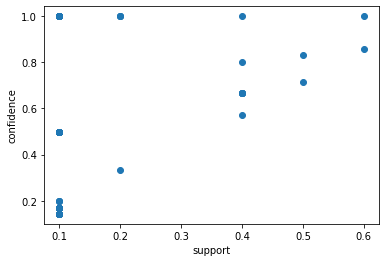

In [78]:
import matplotlib.pyplot as plt

plt.scatter(x,y)
plt.xlabel('support')
plt.ylabel('confidence')

(array([234.,   0.,   4.,   0.,   0.,   0.,   8.,   0.,   2.,   2.]),
 array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 ]),
 <BarContainer object of 10 artists>)

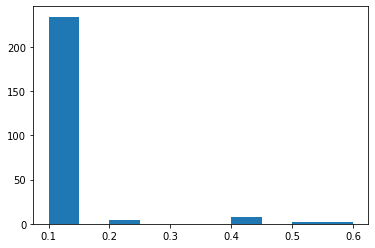

In [79]:
plt.hist(x)


(array([ 33.,   0.,   1.,   0.,  81.,   1.,   6.,   1.,   2., 125.]),
 array([0.14285714, 0.22857143, 0.31428571, 0.4       , 0.48571429,
        0.57142857, 0.65714286, 0.74285714, 0.82857143, 0.91428571,
        1.        ]),
 <BarContainer object of 10 artists>)

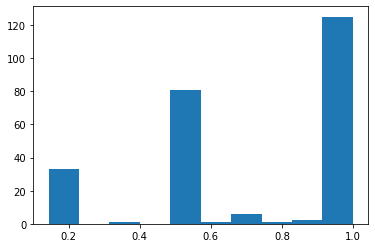

In [80]:
plt.hist(y)


{'whiskers': [<matplotlib.lines.Line2D at 0x17a27ca0>,
 'caps': [<matplotlib.lines.Line2D at 0x17a34070>,
 'boxes': [<matplotlib.lines.Line2D at 0x17a27ad8>],
 'medians': [<matplotlib.lines.Line2D at 0x17a34400>],
 'fliers': [<matplotlib.lines.Line2D at 0x17a345c8>],
 'means': []}

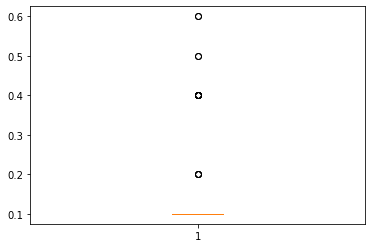

In [83]:
plt.boxplot(x)

{'whiskers': [<matplotlib.lines.Line2D at 0x179f4b20>,
 'caps': [<matplotlib.lines.Line2D at 0x179f4eb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x179f4958>],
 'medians': [<matplotlib.lines.Line2D at 0x17a00268>],
 'fliers': [<matplotlib.lines.Line2D at 0x17a00430>],
 'means': []}

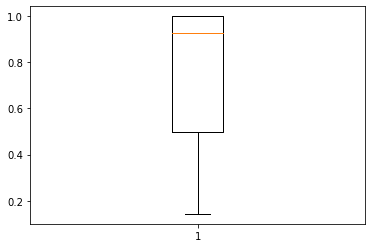

In [82]:
plt.boxplot(y)